In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

pd.set_option("display.max_columns",101)

import gc
import math

c:\programy\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
medical = pd.read_pickle("data/medical.p")
print(medical.UCURNINS.unique())
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)
print(medical.UCURNINS.unique())
levCols = ["UMARSTAT", "USATMED", "URELATE",
                      "REGION", "FHOSP", "UIMMSTAT",
                      "U_FTPT", "UBRACE", "UEDUC3",
                      "GENDER"]

numCols = ["FDENT", "FEMER", "FDOCT", "UAGE",
                     "U_WKSLY", "U_USHRS", "U_HRSLY",
                     "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL"]
# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
print(medical.shape, math.sqrt(medical.shape[0]))


['Yes' 'No']
[1 0]
(35072, 29) 187.275198571514


In [3]:
medical.head()

,UMARSTAT,UCUREMP,UCURNINS,USATMED,URELATE,REGION,STATE,HHID,FHOSP,FDENT,FEMER,FDOCT,UIMMSTAT,U_USBORN,UAGE,U_FTPT,U_WKSLY,U_HRSLY,U_USHRS,HEARNVAL,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,UBRACE,GENDER,UEDUC3,CEYES,CHAIR
0,Never married,No,1,4,2,Midwest,WI,55616128,No,0,0,0,US-born citizen,Yes,22,Full-time,52,40,40,0,0,0,0,0,White,Female,0,hazel,brown
1,Separated,Yes,0,4,2,Midwest,WI,54704000,No,2,0,0,US-born citizen,Yes,30,Full-time,52,40,40,31468,5950,0,0,31468,White,Female,1,blue,black
2,Married_live together,No,0,4,5,Midwest,WI,57874272,No,0,1,0,US-born citizen,Yes,33,Part-time,52,30,30,24700,11340,0,4920,24700,White,Male,0,brown,brown
3,Divorced,No,1,1,4,Midwest,WI,54106816,No,0,0,1,US-born citizen,Yes,41,Part-time,43,40,25,60000,39002,0,0,60000,Black,Female,0,brown,black
4,Never married,Yes,0,4,0,Midwest,WI,54569152,No,2,0,0,US-born citizen,Yes,34,Full-time,52,40,40,55280,4200,0,0,55280,Black,Male,1,brown,black


Lets see the crosstabulation for all nominal variables. We normalize them by the number of observations to see the values in percentages.

In [ ]:
for var in levCols:
    display(((pd.crosstab(medical["UCURNINS"], medical[var], margins=True)/medical.shape[0])*100).round(1))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
medical2 = medical.copy()
for col in levCols:
    medical2[col] = le.fit_transform(medical[col])


Lets calcualte some stats to see whichc varabiles are most valuable.

In [6]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]
for var in levCols:
    print("\n", var)
    print("Pearson", stats.pearsonr(medical2["UCURNINS"], medical2[var]))
    print("Mutual info", feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    minfos.append(feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    print("Chi2", feature_selection.chi2(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    print("Anova", feature_selection.f_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))

imp = list(zip(minfos, levCols))
imp.sort(reverse=True)
imp


 UMARSTAT
Pearson (0.07490337618668176, 8.061762511117048e-45)
Mutual info [0.0199583]
Chi2 (array([127.68821002]), array([1.31336397e-29]))
Anova (array([197.87094591]), array([8.06176251e-45]))

 USATMED
Pearson (-0.15448012688677404, 3.1832522899448036e-186)
Mutual info [0.01780518]
Chi2 (array([266.25219451]), array([7.44299842e-60]))
Anova (array([857.37481022]), array([3.18325229e-186]))

 URELATE
Pearson (-0.014254534194610466, 0.007595043230342103)
Mutual info [0.00679828]
Chi2 (array([6.31763804]), array([0.01195428]))
Anova (array([7.12738273]), array([0.00759504]))

 REGION
Pearson (0.11268947981016836, 1.7806762236122152e-99)
Mutual info [0.0078756]
Chi2 (array([428.19613178]), array([4.01330071e-95]))
Anova (array([451.0793039]), array([1.78067622e-99]))

 FHOSP
Pearson (-0.03343862046103535, 3.7582155563136514e-10)
Mutual info [0]
Chi2 (array([36.04664047]), array([1.92650646e-09]))
Anova (array([39.25711173]), array([3.75821556e-10]))

 UIMMSTAT
Pearson (-0.136392498929

[(array([0.03649926]), 'UEDUC3'),
 (array([0.02501368]), 'UIMMSTAT'),
 (array([0.02115707]), 'UMARSTAT'),
 (array([0.01633779]), 'USATMED'),
 (array([0.01255328]), 'REGION'),
 (array([0.01013295]), 'URELATE'),
 (array([0.00488062]), 'U_FTPT'),
 (array([0.004815]), 'UBRACE'),
 (array([1.63620394e-05]), 'FHOSP'),
 (array([0]), 'GENDER')]

We have less optins for combination of discrete and continous variable. Lets see how the mutual information looks like.

In [7]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


for var in numCols:
    print(var, " Mutual info", feature_selection.mutual_info_regression(medical2[var].astype(float).values.reshape(-1,1),medical["UCURNINS"].astype(float).values))
    minfos.append(feature_selection.mutual_info_regression(medical2[var].astype(float).values.reshape(-1,1),medical["UCURNINS"].astype(float).values))
# We can sort recorded values
imp = list(zip(minfos, numCols))
imp.sort(reverse=True)
imp

FDENT  Mutual info [0.03377415]
FEMER  Mutual info [0.00048269]
FDOCT  Mutual info [0.03445444]
UAGE  Mutual info [0.01184986]
U_WKSLY  Mutual info [0.01012719]
U_USHRS  Mutual info [0.00158415]
U_HRSLY  Mutual info [0.00805279]
HOTHVAL  Mutual info [0]
HRETVAL  Mutual info [0.00326843]
HSSVAL  Mutual info [0]
HWSVAL  Mutual info [0]


[(array([0.03666306]), 'HWSVAL'),
 (array([0.03649926]), 'HRETVAL'),
 (array([0.02501368]), 'U_USHRS'),
 (array([0.02115707]), 'FDENT'),
 (array([0.01633779]), 'FEMER'),
 (array([0.01255328]), 'UAGE'),
 (array([0.01013295]), 'FDOCT'),
 (array([0.00488062]), 'U_HRSLY'),
 (array([0.004815]), 'HOTHVAL'),
 (array([1.63620394e-05]), 'U_WKSLY'),
 (array([0]), 'HSSVAL')]

We can use logistic regression for all variables (one variabel at a time). Then we can calculate any metric or statistic for regression. We chose AUC as a good reference point.

In [8]:
from sklearn import metrics
import statsmodels.api as sm


aucs=[]
for var in levCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

for var in numCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

imp = list(zip(aucs, levCols+numCols))
imp.sort(reverse=True)
imp

UMARSTAT 0.6372515567948391
USATMED 0.6063510287809526
URELATE 0.5165251197687822
REGION 0.6013726061209655
FHOSP 0.512961810848779
UIMMSTAT 0.5934462633726708
U_FTPT 0.5372143757851929
UBRACE 0.5322917815436781
UEDUC3 0.6737774040138675
GENDER 0.5252370568128775
FDENT 0.6964487152576064
FEMER 0.5107957813622168
FDOCT 0.6868935102307081
UAGE 0.6181265687907294
U_WKSLY 0.5856560922320077
U_USHRS 0.5534668036783484
U_HRSLY 0.5497418742333913
HOTHVAL 0.4973190452053029
HRETVAL 0.5061463625158901
HSSVAL 0.5024899514109548
HWSVAL 0.49694189994742205


[(0.6964487152576064, 'FDENT'),
 (0.6868935102307081, 'FDOCT'),
 (0.6737774040138675, 'UEDUC3'),
 (0.6372515567948391, 'UMARSTAT'),
 (0.6181265687907294, 'UAGE'),
 (0.6063510287809526, 'USATMED'),
 (0.6013726061209655, 'REGION'),
 (0.5934462633726708, 'UIMMSTAT'),
 (0.5856560922320077, 'U_WKSLY'),
 (0.5534668036783484, 'U_USHRS'),
 (0.5497418742333913, 'U_HRSLY'),
 (0.5372143757851929, 'U_FTPT'),
 (0.5322917815436781, 'UBRACE'),
 (0.5252370568128775, 'GENDER'),
 (0.5165251197687822, 'URELATE'),
 (0.512961810848779, 'FHOSP'),
 (0.5107957813622168, 'FEMER'),
 (0.5061463625158901, 'HRETVAL'),
 (0.5024899514109548, 'HSSVAL'),
 (0.4973190452053029, 'HOTHVAL'),
 (0.49694189994742205, 'HWSVAL')]

Now lets take a look at Spearman corellation for both numerical and categorical variables.

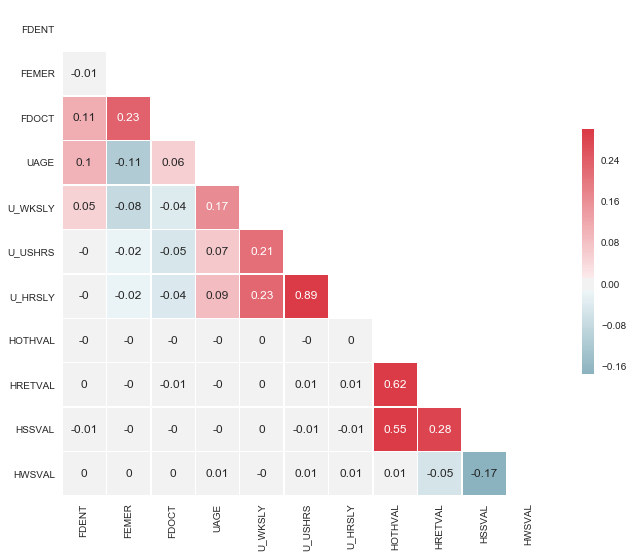

In [20]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical[numCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

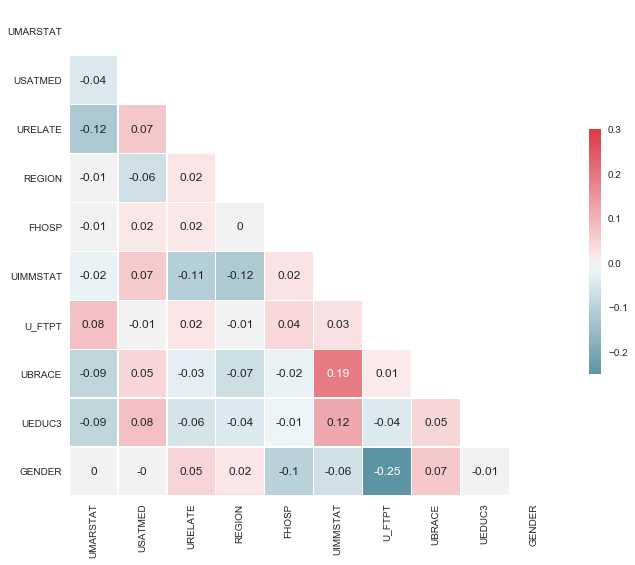

In [21]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical2[levCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
features = numCols + levCols
# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
medical2[numCols] = medical2[numCols].apply(lambda x: (x-x.mean())/x.std())
features = medical2.columns.tolist()

In [33]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
def runKNN(features=features):
    n_neighbors = 30
    kf = KFold(n_splits=5)
    sampleSize = 5000
    probs = []
    aucs = []
    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=1)
    for train, test in kf.split(medical2.index.values):
        X = medical2.iloc[train][features].sample(sampleSize)
        clf.fit(X.values, medical.iloc[X.index.values]["UCURNINS"].values)
        prob = clf.predict_proba(medical2.iloc[test][features].values)
        aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    print(np.mean(aucs), aucs)
    return np.mean(aucs)

In [34]:
# newFeatures = ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'UAGE']
newFeatures = []
tempFeatures = []

for k in range(10):
    aucs=[]
    featToTest = list(set(features) - set(newFeatures))
    for feat in featToTest:
        tempFeatures = newFeatures.copy()
        tempFeatures.append(feat)
        auc = runKNN(tempFeatures)
        aucs.append(auc)
        print(feat, tempFeatures, auc)
    imp = list(zip(aucs, featToTest))
    imp.sort(reverse=True)
    print(imp[0:5])
    print("##############")
    print("Selecting:", imp[0][1])
    newFeatures.append(imp[0][1])
    print("Current selection:", newFeatures)
    print("##############")

0.5858563615283007 [0.5776469777454556, 0.5900529492081568, 0.5816547331492983, 0.5981079402568877, 0.5818192072817048]
UIMMSTAT_Foreign-born, non-citizen ['UIMMSTAT_Foreign-born, non-citizen'] 0.5858563615283007
0.6938978801996668 [0.6943955279325876, 0.6993036966628979, 0.6658105069725153, 0.6787276657871995, 0.7312520036431334]
FDENT ['FDENT'] 0.6938978801996668
0.5028008087213273 [0.5180691599881271, 0.5, 0.49040645847711073, 0.5137396420502133, 0.49178878309118546]
FHOSP_Yes ['FHOSP_Yes'] 0.5028008087213273
0.49019316817914477 [0.48116444774114525, 0.4950255133017263, 0.4854234618565623, 0.49972155521842393, 0.489630862777866]
HWSVAL ['HWSVAL'] 0.49019316817914477
0.5160448830554935 [0.47324745387288797, 0.5179038346856778, 0.5247045376121463, 0.5368176161581428, 0.5275509729486125]
UBRACE_White ['UBRACE_White'] 0.5160448830554935
0.6734540203400575 [0.6830036229452798, 0.6801069103135262, 0.6608910975823502, 0.6628800006525803, 0.6803884702065506]
UEDUC3 ['UEDUC3'] 0.673454020340

0.6786919850716326 [0.6995336508322256, 0.6476840371190882, 0.6398296889206568, 0.677695537651774, 0.728717010834419]
UMARSTAT_Married, do not live together ['FDENT', 'UMARSTAT_Married, do not live together'] 0.6786919850716326
0.6740391480614766 [0.6197440694144951, 0.6987315531138102, 0.6933508810126304, 0.6297149525475189, 0.7286542842189281]
UMARSTAT_Separated ['FDENT', 'UMARSTAT_Separated'] 0.6740391480614766
0.6918541604405382 [0.6973529618015946, 0.6824744968172459, 0.6979328416149069, 0.6797421460139336, 0.70176835595501]
HRETVAL ['FDENT', 'HRETVAL'] 0.6918541604405382
0.6792669276035392 [0.652448888542292, 0.6360680473891702, 0.7002064060326223, 0.6806050110962207, 0.7270062849573913]
UMARSTAT_Widowed ['FDENT', 'UMARSTAT_Widowed'] 0.6792669276035392
0.6973051960918146 [0.7084317960752736, 0.6915835112023767, 0.6821691992014197, 0.6773359909253669, 0.7270054830546364]
U_FTPT_Part-time ['FDENT', 'U_FTPT_Part-time'] 0.6973051960918146
0.6776630842844783 [0.6883549936252364, 0.676

0.7349445642791131 [0.7188977130044572, 0.7443649973960512, 0.7235794629848719, 0.7295503485422749, 0.7583302994679109]
REGION_West ['FDENT', 'FDOCT', 'REGION_West'] 0.7349445642791131
0.7351460456048224 [0.7157533283882821, 0.7471517623201859, 0.7282446946169772, 0.7329369430025885, 0.7516434996960789]
UBRACE_Asian/Pacific Islander ['FDENT', 'FDOCT', 'UBRACE_Asian/Pacific Islander'] 0.7351460456048224
0.731929735132622 [0.7363367265574041, 0.7313250996381455, 0.7141537472476914, 0.7264926326648201, 0.7513404695550492]
UMARSTAT_Unknown ['FDENT', 'FDOCT', 'UMARSTAT_Unknown'] 0.731929735132622
[(0.7646946510713517, 'UMARSTAT_Married_live together'), (0.7626349692727703, 'UEDUC3'), (0.74953468815759, 'UIMMSTAT_US-born citizen'), (0.7485282087188966, 'USATMED'), (0.747259703598929, 'UAGE')]
##############
Selecting: UMARSTAT_Married_live together
Current selection: ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together']
##############
0.7761009795922513 [0.7786303658793878, 0.7822047250203054

0.7810370189161533 [0.7813983553170486, 0.7824781902420728, 0.7780774850197728, 0.7682824098352659, 0.7949486541666065]
HWSVAL ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'HWSVAL'] 0.7810370189161533
0.7845887473025035 [0.7793869345457777, 0.7942540597316178, 0.7739610890652557, 0.7751170134781392, 0.8002246396917272]
UBRACE_White ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'UBRACE_White'] 0.7845887473025035
0.7913663288056728 [0.7864151189200201, 0.7937608441651307, 0.779525784750293, 0.7855266128110012, 0.8116032833819198]
UIMMSTAT_US-born citizen ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'UIMMSTAT_US-born citizen'] 0.7913663288056728
0.7832445008565107 [0.7849034929109848, 0.7834477564214998, 0.7705991817016663, 0.7704411804615532, 0.806830892786849]
U_USHRS ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'U_USHRS'] 0.7832445008565107
0.7906567107897737 [0.7914697411827861, 0.7992467605797227, 0.78373478014394

0.7936102160585422 [0.7839396461930662, 0.7984868257728871, 0.7865434871613701, 0.7853797037755387, 0.8137014173898494]
UMARSTAT_Never married ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'UMARSTAT_Never married'] 0.7936102160585422
0.7954272424191666 [0.7896095283521312, 0.8009714550542242, 0.7962509379758346, 0.7843673412978476, 0.805936949415796]
UBRACE_Black ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'UBRACE_Black'] 0.7954272424191666
0.7935393843766099 [0.7852765631772619, 0.8065778715619105, 0.7893782966084985, 0.781606424027008, 0.8048577665083712]
UMARSTAT_Partnership ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'UMARSTAT_Partnership'] 0.7935393843766099
0.7982659305758115 [0.7923622534199745, 0.8065959170622061, 0.7899560589130983, 0.7861012287179947, 0.8163141947657847]
UAGE ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'UAGE'] 0.7982659305758115
0.796904005493

0.7963794863849254 [0.7924002632121434, 0.8051531202862455, 0.7905878232935686, 0.7794369862203561, 0.8143192389123134]
UMARSTAT_Married, do not live together ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UMARSTAT_Married, do not live together'] 0.7963794863849254
0.7958854014069056 [0.7879180548175257, 0.8046199347798517, 0.7914383345930964, 0.7801902773984567, 0.815260405445597]
UMARSTAT_Separated ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UMARSTAT_Separated'] 0.7958854014069056
0.7983117834061859 [0.7954870663936611, 0.806299346854079, 0.789913867116895, 0.7830539447154554, 0.8168046919508387]
HRETVAL ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'HRETVAL'] 0.7983117834061859
0.7946076057716905 [0.7914978518044298, 0.8064913543502136, 0.7830034842036654, 0.7757024534357968, 0.8163428850643474]
UMARSTAT_Widowed ['FDENT', 'FDOCT', 'UMARST

0.8043959105298478 [0.8047956115994702, 0.8135292681149839, 0.7892898906744663, 0.7886985302664771, 0.825666251993842]
UMARSTAT_Widowed ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'UMARSTAT_Widowed'] 0.8043959105298478
0.7986040901344953 [0.7838678583152127, 0.8059366660280471, 0.8002443529746843, 0.7847285351623992, 0.8182430381921334]
HSSVAL ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'HSSVAL'] 0.7986040901344953
0.8041382702972995 [0.7974000244229916, 0.8128496104870329, 0.803279509267475, 0.7882350569666648, 0.8189271503423323]
REGION_Northeast ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'REGION_Northeast'] 0.8041382702972995
0.80436579476577 [0.7957471652100527, 0.8105368350823414, 0.7993403530897062, 0.7939885105055255, 

0.8067205146623447 [0.8079549583207137, 0.8160327018195261, 0.7983277499808297, 0.7919690407051758, 0.819318122485478]
REGION_Northeast ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'REGION_Northeast'] 0.8067205146623447
0.8067338493974759 [0.8059556281393973, 0.8181748882190879, 0.7967744414593535, 0.7957432616755035, 0.8170210274940379]
U_HRSLY ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'U_HRSLY'] 0.8067338493974759
0.8026341013573777 [0.8061700094125244, 0.8059860803419403, 0.7869301454478732, 0.7967225245200042, 0.817361747064546]
HOTHVAL ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'HOTHVAL'] 0.8026341013573777
0.8039748968260095 [0.7989636399688305, 0.8184859622872654, 0.7930852695345448, 0

0.8070925323355322 [0.8037577855842688, 0.8092789625220256, 0.8016828963872182, 0.8010537919237837, 0.8196892252603645]
HOTHVAL ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'UAGE', 'HOTHVAL'] 0.8070925323355322
0.8084306249324855 [0.7991800615290123, 0.8213888424165724, 0.802633281573499, 0.7978298719640303, 0.8211210671793141]
GENDER_Male ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'UAGE', 'GENDER_Male'] 0.8084306249324855
0.8059064099743818 [0.7991722026455421, 0.8144063300242046, 0.7961049355329892, 0.7954371292860691, 0.8244114523831034]
FEMER ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'UAGE', 'FEMER'] 0.8059064099743818
0.8063899519378968 [0.8032592754472159, 0.8189872730314551, 0.80000592

## Excercises

In [ ]:
# Exercise 8.1
# Import the data from data/churn.csv and 
# check the existence of zero-variance and
# near-zero variabce variables

In [ ]:
# Exercise 8.2
# Check correlations between variables

In [ ]:
# Exercise 8.3
# Starting from some general model try
# automatic selection of variables
# using different filtering approaches
# (supervised and unsupervised)

In [ ]:
# Exercise 8.4
# Run logistic regression with backward
# elimination of variables. Save the final model.

In [ ]:
# Exercise 8.5
# Compare the predictive accuracy 
# on the test sample for logistic regression 
# models including:
# - all sensible variables (w/o redundant and
#   irrelevant features)
# - variables left after backward elimination
# - top 3 categorical and top 3 continuous variables